In [3]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "Pass.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Filter rows where typeId == 1
filtered_data = data[data['typeId'] == 1]

# Check that the required columns for distance calculation exist
if {'x', 'y', 'endX', 'endY'}.issubset(filtered_data.columns):
    # Calculate distance using Euclidean formula
    filtered_data['distance'] = np.sqrt(
        (filtered_data['endX'] - filtered_data['x'])**2 +
        (filtered_data['endY'] - filtered_data['y'])**2
    )
    
    # Categorize passes based on distance
    def categorize_distance(distance):
        if distance < 5:
            return 'short'
        elif 5 <= distance < 15:
            return 'medium'
        else:
            return 'long'

    filtered_data['pass_category'] = filtered_data['distance'].apply(categorize_distance)

    # Calculate counts of each category
    category_counts = filtered_data['pass_category'].value_counts()

    print("Pass categories count:")
    print(category_counts)

    # Optional: Save the categorized data
    filtered_data.to_excel("categorized_passes_with_distances.xlsx", index=False)
else:
    print("The required columns 'x', 'y', 'endx', 'endy' are not found in the data.")


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_67541/1667277871.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['distance'] = np.sqrt(
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_67541/1667277871.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pass_category'] = filtered_data['distance'].apply(categorize_distance)


Pass categories count:
long      94158
medium    41853
short      4920
Name: pass_category, dtype: int64


In [5]:
import pandas as pd

# Load the Excel file with distances and categories
file_path = "categorized_passes_with_distances.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Ensure the necessary columns exist
if {'x', 'endX', 'pass_category'}.issubset(data.columns):
    # Function to classify zones based on x and endx
    def classify_zone(x_coordinate):
        if 0 <= x_coordinate <= 33:
            return 'Defensive Third'
        elif 34 <= x_coordinate <= 66:
            return 'Middle Third'
        elif 67 <= x_coordinate <= 100:
            return 'Attacking Third'
        else:
            return 'Out of Bounds'

    # Add columns for starting and ending zones
    data['Starting Zone'] = data['x'].apply(classify_zone)
    data['Ending Zone'] = data['endX'].apply(classify_zone)

    # Define the weight rules
    weight_mapping = {
        ('Short', 'Defensive Third', 'Defensive Third'): 1.0,
        ('Short', 'Defensive Third', 'Middle Third'): 1.2,
        ('Short', 'Middle Third', 'Middle Third'): 1.3,
        ('Medium', 'Defensive Third', 'Defensive Third'): 1.5,
        ('Medium', 'Defensive Third', 'Middle Third'): 1.7,
        ('Medium', 'Middle Third', 'Middle Third'): 1.8,
        ('Long', 'Defensive Third', 'Defensive Third'): 2.0,
        ('Long', 'Defensive Third', 'Middle Third'): 2.3,
        ('Long', 'Middle Third', 'Middle Third'): 2.5,
    }

    # Apply weights based on pass type, starting zone, and ending zone
    def calculate_weight(row):
        key = (row['pass_category'], row['Starting Zone'], row['Ending Zone'])
        return weight_mapping.get(key, 0)  # Default weight is 0 if no match

    data['Weight'] = data.apply(calculate_weight, axis=1)

    # Display a summary of weights
    weight_summary = data.groupby(['pass_category', 'Starting Zone', 'Ending Zone'])['Weight'].sum()

    print("Pass weights by category and zones:")
    print(weight_summary)

    # Save the updated data to a new Excel file
    data.to_excel("passes_with_weights.xlsx", index=False)
else:
    print("The required columns 'x', 'endx', and 'pass_category' are not found in the data.")


Pass weights by category and zones:
pass_category  Starting Zone    Ending Zone    
long           Attacking Third  Attacking Third    0
                                Defensive Third    0
                                Middle Third       0
                                Out of Bounds      0
               Defensive Third  Attacking Third    0
                                Defensive Third    0
                                Middle Third       0
                                Out of Bounds      0
               Middle Third     Attacking Third    0
                                Defensive Third    0
                                Middle Third       0
                                Out of Bounds      0
               Out of Bounds    Attacking Third    0
                                Defensive Third    0
                                Middle Third       0
                                Out of Bounds      0
medium         Attacking Third  Attacking Third    0
               

In [6]:
import pandas as pd

# Load the Excel file with distances and categories
file_path = "categorized_passes_with_distances.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Ensure the data is loaded correctly
if data.empty:
    print("The Excel file is empty.")
else:
    # Ensure the necessary columns exist
    if {'x', 'endX', 'pass_category'}.issubset(data.columns):
        # Function to classify zones based on x and endx
        def classify_zone(x_coordinate):
            if 0 <= x_coordinate <= 33:
                return 'Defensive Third'
            elif 34 <= x_coordinate <= 66:
                return 'Middle Third'
            elif 67 <= x_coordinate <= 100:
                return 'Attacking Third'
            else:
                return 'Out of Bounds'

        # Add columns for starting and ending zones
        data['Starting Zone'] = data['x'].apply(classify_zone)
        data['Ending Zone'] = data['endX'].apply(classify_zone)

        # Check the zone classifications
        print("Zone classifications:")
        print(data[['x', 'endX', 'Starting Zone', 'Ending Zone']].head())

        # Define the weight rules
        weight_mapping = {
            ('Short', 'Defensive Third', 'Defensive Third'): 1.0,
            ('Short', 'Defensive Third', 'Middle Third'): 1.2,
            ('Short', 'Middle Third', 'Middle Third'): 1.3,
            ('Medium', 'Defensive Third', 'Defensive Third'): 1.5,
            ('Medium', 'Defensive Third', 'Middle Third'): 1.7,
            ('Medium', 'Middle Third', 'Middle Third'): 1.8,
            ('Long', 'Defensive Third', 'Defensive Third'): 2.0,
            ('Long', 'Defensive Third', 'Middle Third'): 2.3,
            ('Long', 'Middle Third', 'Middle Third'): 2.5,
        }

        # Apply weights based on pass type, starting zone, and ending zone
        def calculate_weight(row):
            key = (row['pass_category'], row['Starting Zone'], row['Ending Zone'])
            # Print the key to debug which combination is being matched
            print(f"Calculating weight for: {key}")
            return weight_mapping.get(key, 0)  # Default weight is 0 if no match

        data['Weight'] = data.apply(calculate_weight, axis=1)

        # Check if the 'Weight' column has been populated correctly
        print("Weights in the data:")
        print(data[['pass_category', 'Starting Zone', 'Ending Zone', 'Weight']].head())

        # Display a summary of weights
        weight_summary = data.groupby(['pass_category', 'Starting Zone', 'Ending Zone'])['Weight'].sum()

        print("Pass weights by category and zones:")
        print(weight_summary)

        # Save the updated data to a new Excel file
        output_file = "passes_with_weights.xlsx"
        try:
            data.to_excel(output_file, index=False)
            print(f"Data saved to {output_file}")
        except Exception as e:
            print(f"Error saving the file: {e}")
    else:
        print("The required columns 'x', 'endX', and 'pass_category' are not found in the data.")


Zone classifications:
      x  endX    Starting Zone      Ending Zone
0  50.2  38.6     Middle Third     Middle Third
1  38.6  41.4     Middle Third     Middle Third
2  41.4  31.0     Middle Third  Defensive Third
3  31.0  34.8  Defensive Third     Middle Third
4  35.1  32.1     Middle Third  Defensive Third
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight f

Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'M

Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Defensive Third')
Calculating weight for: ('medium', 'Middle Third', 'Out of Bounds')
Calculating weight for: ('medium', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('medium', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weig

Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defens

Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('short', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Attacking Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('medium', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('medium', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('short', 'Defensive

Calculating weight for: ('medium', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('short', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle

Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Out of Bounds')
Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Out of Bounds')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Thi

Calculating weight for: ('medium', 'Defensive Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Defensive Third', 'Attacking Third')
Calculating weight for: ('medium', 'Defensive Third', 'Out of Bounds')
Calculating weight for: ('medium', 'Attacking Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Out of Bounds')
Calculating weight for: ('long', 'Defensive Th

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('medium', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calcul

Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('short', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('short', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Out of Bounds', 'Attacking Third')
Calculating weight for: ('medium', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'De

Calculating weight for: ('long', 'Out of Bounds', 'Attacking Third')
Calculating weight for: ('medium', 'Attacking Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Middle Third')
Calculating weight for: ('medium', 'Middle Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Out of Bounds', 'Defensive Third')
Calculating weight for: (

Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Attacking Third')
Calculating weight for: ('long', 'Defensive Third', 'Defensive Third')
Calculating weight for: ('medium', 'Defensive Third', 'Out of Bounds')
Calculating weight for: ('medium', 'Out of Bounds', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Middle Third')
Calculating weight for: ('long', 'Middle Third', 'Midd

Weights in the data:
  pass_category    Starting Zone      Ending Zone  Weight
0        medium     Middle Third     Middle Third       0
1        medium     Middle Third     Middle Third       0
2        medium     Middle Third  Defensive Third       0
3          long  Defensive Third     Middle Third       0
4        medium     Middle Third  Defensive Third       0
Pass weights by category and zones:
pass_category  Starting Zone    Ending Zone    
long           Attacking Third  Attacking Third    0
                                Defensive Third    0
                                Middle Third       0
                                Out of Bounds      0
               Defensive Third  Attacking Third    0
                                Defensive Third    0
                                Middle Third       0
                                Out of Bounds      0
               Middle Third     Attacking Third    0
                                Defensive Third    0
                 

In [13]:
import pandas as pd

# Load the new Excel file
file_path = "categorized_passes_with_distances.xlsx"  # Replace with your new Excel file path
data = pd.read_excel(file_path)

# Ensure the data is loaded correctly
if data.empty:
    print("The Excel file is empty.")
else:
    # Filter rows where typeId == 1
    data = data[data['typeId'] == 1]

    # Ensure the necessary columns exist
    if {'contestantId', 'playerName', 'x', 'y', 'endX', 'endY', 'distance', 'pass_category', 'typeId', 'outcome'}.issubset(data.columns):
        
        # Function to classify zones based on x and endx
        def classify_zone(x_coordinate):
            if 0 <= x_coordinate <= 33:
                return 'Defensive Third'
            elif 34 <= x_coordinate <= 66:
                return 'Middle Third'
            elif 67 <= x_coordinate <= 100:
                return 'Attacking Third'
            else:
                return 'Out of Bounds'

        # Add columns for starting and ending zones
        data['Starting Zone'] = data['x'].apply(classify_zone)
        data['Ending Zone'] = data['endX'].apply(classify_zone)

        # Define the weight rules
        weight_mapping = {
            ('Short', 'Defensive Third', 'Defensive Third'): 1.0,
            ('Short', 'Defensive Third', 'Middle Third'): 1.2,
            ('Short', 'Middle Third', 'Middle Third'): 1.3,
            ('Medium', 'Defensive Third', 'Defensive Third'): 1.5,
            ('Medium', 'Defensive Third', 'Middle Third'): 1.7,
            ('Medium', 'Middle Third', 'Middle Third'): 1.8,
            ('Long', 'Defensive Third', 'Defensive Third'): 2.0,
            ('Long', 'Defensive Third', 'Middle Third'): 2.3,
            ('Long', 'Middle Third', 'Middle Third'): 2.5,
        }

        # Apply weights based on pass type, starting zone, and ending zone
        def calculate_weight(row):
            key = (row['pass_category'], row['Starting Zone'], row['Ending Zone'])
            return weight_mapping.get(key, 0)  # Default weight is 0 if no match

        data['Weight'] = data.apply(calculate_weight, axis=1)

        # Check if the 'Weight' column has been populated correctly
        print("Weights in the data:")
        print(data[['contestantId', 'playerName', 'x', 'y', 'endX', 'endY', 'distance', 'pass_category', 'Starting Zone', 'Ending Zone', 'Weight', 'outcome']].head())

        # Save the updated data to a new Excel file
        output_file = "passes_with_weights_assigned.xlsx"
        try:
            # Select the relevant columns to save, including 'outcome'
            data_to_save = data[['contestantId', 'playerName', 'x', 'y', 'endX', 'endY', 'distance', 'pass_category', 'Starting Zone', 'Ending Zone', 'Weight', 'outcome']]
            data_to_save.to_excel(output_file, index=False)
            print(f"Data saved to {output_file}")
        except Exception as e:
            print(f"Error saving the file: {e}")
    else:
        print("The required columns are not found in the data.")


Weights in the data:
                contestantId   playerName     x     y  endX  endY   distance  \
0  24fvcruwqrqvqa3aonf8c3zuy       G. Til  50.2  50.0  38.6  44.2  12.969194   
1  24fvcruwqrqvqa3aonf8c3zuy   J. Veerman  38.6  44.2  41.4  56.9  13.004999   
2  24fvcruwqrqvqa3aonf8c3zuy   M. Tillman  41.4  56.9  31.0  55.5  10.493808   
3  24fvcruwqrqvqa3aonf8c3zuy  O. Boscagli  31.0  55.5  34.8  70.8  15.764834   
4  24fvcruwqrqvqa3aonf8c3zuy      M. Dams  35.1  70.8  32.1  58.1  13.049521   

  pass_category    Starting Zone      Ending Zone  Weight  outcome  
0        medium     Middle Third     Middle Third       0        1  
1        medium     Middle Third     Middle Third       0        1  
2        medium     Middle Third  Defensive Third       0        1  
3          long  Defensive Third     Middle Third       0        1  
4        medium     Middle Third  Defensive Third       0        1  
Data saved to passes_with_weights_assigned.xlsx


In [14]:
import pandas as pd

# Load the existing Excel file
file_path = "passes_with_weights_assigned.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Clean the data by stripping whitespace and converting to consistent case
data['pass_category'] = data['pass_category'].str.strip().str.title()
data['Starting Zone'] = data['Starting Zone'].str.strip().str.title()
data['Ending Zone'] = data['Ending Zone'].str.strip().str.title()

# Define a function to calculate the weight
def calculate_weight(row):
    # Extract pass category, starting zone, and ending zone
    pass_category = row['pass_category']
    start_zone = row['Starting Zone']
    end_zone = row['Ending Zone']
    
    # Default weight
    weight = 0
    
    # Apply conditions for weight calculation
    if pass_category == 'Short':
        if start_zone == 'Defensive Third' and end_zone == 'Defensive Third':
            weight = 1.0
        elif start_zone == 'Defensive Third' and end_zone == 'Middle Third':
            weight = 1.2
        elif start_zone == 'Middle Third' and end_zone == 'Middle Third':
            weight = 1.3
    elif pass_category == 'Medium':
        if start_zone == 'Defensive Third' and end_zone == 'Defensive Third':
            weight = 1.5
        elif start_zone == 'Defensive Third' and end_zone == 'Middle Third':
            weight = 1.7
        elif start_zone == 'Middle Third' and end_zone == 'Middle Third':
            weight = 1.8
    elif pass_category == 'Long':
        if start_zone == 'Defensive Third' and end_zone == 'Defensive Third':
            weight = 2.0
        elif start_zone == 'Defensive Third' and end_zone == 'Middle Third':
            weight = 2.3
        elif start_zone == 'Middle Third' and end_zone == 'Middle Third':
            weight = 2.5
    
    return weight

# Apply the weight calculation to each row
data['Weight'] = data.apply(calculate_weight, axis=1)

# Check the first few rows to ensure the weights are applied
print(data[['pass_category', 'Starting Zone', 'Ending Zone', 'Weight']].head())

# Save the updated DataFrame to a new Excel file
output_file = "Passes with weights - GV+.xlsx"
data.to_excel(output_file, index=False)
print(f"Data with weights saved to {output_file}")


  pass_category    Starting Zone      Ending Zone  Weight
0        Medium     Middle Third     Middle Third     1.8
1        Medium     Middle Third     Middle Third     1.8
2        Medium     Middle Third  Defensive Third     0.0
3          Long  Defensive Third     Middle Third     2.3
4        Medium     Middle Third  Defensive Third     0.0
Data with weights saved to Passes with weights - GV+.xlsx


In [17]:
file_path = "Passes with weights - GV+.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)# preprocess the dataframe so we only have the data we want
# We want to get it down to be only successful passes made by Bruno Penandes
# we can use pandas .loc method to achieve this with a bunch of & statements

#df = df.loc[(df['teamId']==212) & (df['playerId']==85470) & (df['outcomeType/displayName']=='Successful') & (df['type/displayName']=='Pass')]

#Import xT Grid, turn it into an array, and then get how many rows and columns it has
xT = pd.read_csv("xT_grid.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape
xT

print(xT_rows,xT_cols)

df['x1_bin'] = pd.cut(df['x'], bins=xT_cols, labels=False)
df['y1_bin'] = pd.cut(df['y'], bins=xT_rows, labels=False)
df['x2_bin'] = pd.cut(df['endX'], bins=xT_cols, labels=False)
df['y2_bin'] = pd.cut(df['endY'], bins=xT_rows, labels=False)

df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)

df['xT'] = df['end_zone_value'] - df['start_zone_value']

df.head()

df.to_excel("GV+ xT.xlsx") 

8 12


In [29]:
import pandas as pd

# Load the main Excel file and the player filter list
main_file_path = "GV+ xT.xlsx"  # Replace with your main file path
filter_file_path = "NLGK.xlsx"  # Replace with your filter file path

# Load both files into DataFrames
main_data = pd.read_excel(main_file_path)
filter_data = pd.read_excel(filter_file_path)

# Ensure the necessary columns exist in both DataFrames
if 'playerName' in main_data.columns and 'Player' in filter_data.columns and 'Minutes played' in filter_data.columns:
    
    # Get the list of players to include
    players_to_include = filter_data['Player'].unique()
    
    # Filter the rows where playerName is in the list of players to include
    filtered_data = main_data[main_data['playerName'].isin(players_to_include)]
    
    # Merge the filtered data with the 'Minutes Played' column from the filter file
    merged_data = pd.merge(
        filtered_data,
        filter_data[['Player', 'Minutes played']],
        left_on='playerName',
        right_on='Player',
        how='left'
    )
    
    # Drop the redundant 'Player' column from the merge
    merged_data.drop(columns=['Player'], inplace=True)
    
    # Save the merged data to a new Excel file
    output_file = "filtered_passes_with_minutes.xlsx"
    try:
        merged_data.to_excel(output_file, index=False)
        print(f"Filtered data with 'Minutes Played' saved to {output_file}")
    except Exception as e:
        print(f"Error saving the file: {e}")
else:
    print("The required columns are not found in one or both files.")


Filtered data with 'Minutes Played' saved to filtered_passes_with_minutes.xlsx


In [30]:
import pandas as pd
from scipy.stats import zscore

# Load the existing Excel file
file_path = "filtered_passes_with_minutes.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)


# Ensure the necessary columns exist
if {'contestantId', 'playerName', 'x', 'y', 'endX', 'endY', 'distance', 'pass_category', 'outcome', 'Weight', 'xT'}.issubset(data.columns):
    
    # Group the data by playerName and calculate Z-scores for 'xT' and 'Weight'
    data['xT_zscore'] = data.groupby('playerName')['xT'].transform(lambda x: zscore(x, nan_policy='omit'))
    data['Weight_zscore'] = data.groupby('playerName')['Weight'].transform(lambda x: zscore(x, nan_policy='omit'))

    # Adjust for 'outcome' being 0, if outcome is 0, negate the Z-score value
    data['xT_zscore'] = data.apply(lambda row: -row['xT_zscore'] if row['outcome'] == 0 else row['xT_zscore'], axis=1)
    data['Weight_zscore'] = data.apply(lambda row: -row['Weight_zscore'] if row['outcome'] == 0 else row['Weight_zscore'], axis=1)

    # Create the 'GV+' score column based on 'outcome'
    data['GV+'] = data['outcome'].apply(lambda outcome: 1 if outcome == 1 else -1)

    # Save the updated data to a new Excel file
    output_file = "passes_with_zscores_and_GVplus.xlsx"
    try:
        # Select the relevant columns to save
        data_to_save = data[['contestantId', 'playerName', 'Minutes played','x', 'y', 'endX', 'endY', 'distance', 'pass_category', 'Starting Zone', 'Ending Zone', 'Weight', 'xT', 'xT_zscore', 'Weight_zscore', 'GV+', 'outcome']]
        data_to_save.to_excel(output_file, index=False)
        print(f"Data saved to {output_file}")
    except Exception as e:
        print(f"Error saving the file: {e}")


Data saved to passes_with_zscores_and_GVplus.xlsx


In [35]:
import pandas as pd

# Load the existing Excel file
file_path = "passes_with_zscores_and_GVplus.xlsx"  # Replace with your file path
filter_file_path = "NLGK.xlsx"  # File with Minutes Played data

data = pd.read_excel(file_path)
filter_data = pd.read_excel(filter_file_path)

# Ensure the necessary columns exist
if {'GV+', 'xT', 'Weight', 'contestantId', 'playerName'}.issubset(data.columns) and 'Minutes played' in filter_data.columns:

    # Calculate the new score using the weighted mean formula
    data['New Score'] = (data['GV+'] * 1 + data['xT'] * 1 + data['Weight'] * 2) / (1 + 1 + 2)
    
    # Summarize the New Score for each unique playerName and include contestantId
    player_summary = data.groupby(['contestantId', 'playerName'])['New Score'].sum().reset_index()

    # Merge Minutes Played into the player_summary
    player_summary = pd.merge(
        player_summary,
        filter_data[['Player', 'Minutes played']],
        left_on='playerName',
        right_on='Player',
        how='left'
    )

    # Drop redundant 'Player' column after merge
    player_summary.drop(columns=['Player'], inplace=True)

    # Apply Min-Max Scaling to scale New Score to the range [0, 2]
    min_score = player_summary['New Score'].min()
    max_score = player_summary['New Score'].max()

    # Scale the New Score between 0 and 2
    player_summary['Scaled New Score'] = ((player_summary['New Score'] - min_score) / (max_score - min_score)) * 2

    # Check the summary for each player with the scaled scores
    print(player_summary)

    # Save the summarized data with scaled scores to a new Excel file
    output_file = "passes_with_scaled_new_score_summary_0_to_2.xlsx"
    try:
        player_summary.to_excel(output_file, index=False)
        print(f"Data saved to {output_file}")
    except Exception as e:
        print(f"Error saving the file: {e}")



                 contestantId        playerName   New Score  Minutes played  \
0   1fttb31hnskynpku8qd09yhm8         N. Bakker  398.171456            1655   
1   20vymiy7bo8wkyxai3ew494fz         J. Bijlow   90.877840             197   
2   20vymiy7bo8wkyxai3ew494fz  T. Wellenreuther  667.509680            1473   
3   24fvcruwqrqvqa3aonf8c3zuy        W. Benítez  664.631859            1642   
4   2uuh2bir8ktof0uxfo06lb4ox    J. Schendelaar  645.684189            1680   
5   3ebril33e08ddzob4bhq8awsr   M. Branderhorst  389.348084            1556   
6   3kfktv64h7kg7zryax1wktr5r           J. Zoet  147.564881             392   
7   3kfktv64h7kg7zryax1wktr5r    R. Owusu-Oduro  340.107431            1274   
8   4tic29sox7m39fy1ztgv0jsiq     L. Unnerstall  573.158366            1367   
9   4tic29sox7m39fy1ztgv0jsiq          P. Tytoń   82.160807             196   
10  4vd2t5schmvvufrfib7f2vjdf        A. Noppert  228.540261             480   
11  4vd2t5schmvvufrfib7f2vjdf   M. van der Hart  549

/Users/marclambertes/anaconda3/lib/python3.10/site-packages/adjustText/__init__.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[ix] = t_x
/Users/marclambertes/anaconda3/lib/python3.10/site-packages/adjustText/__init__.py:572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[ix] = t_y


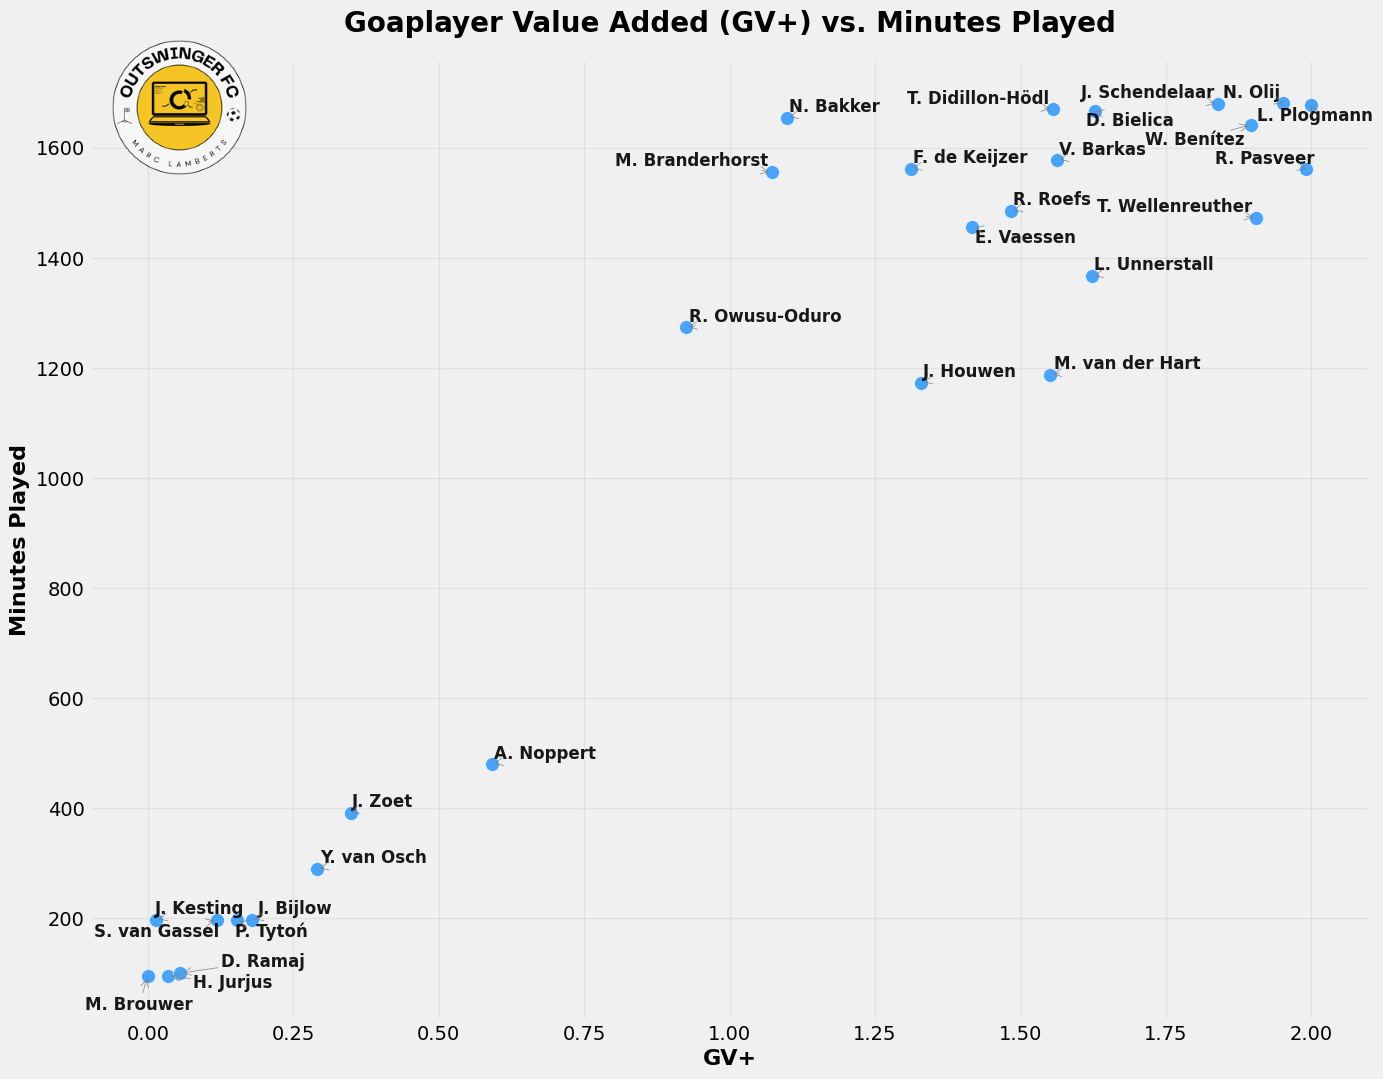

Scatterplot with arrows saved to scatterplot_with_arrows_larger.png


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the data
file_path = "passes_with_scaled_new_score_summary_0_to_2.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Define a function to add a logo to the plot
def add_logo(ax, logo_path, x=0.05, y=0.95, zoom=0.3):  # Top-left with larger zoom
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), xycoords='axes fraction', frameon=False)
    ax.add_artist(ab)

# Create the scatterplot
plt.style.use('fivethirtyeight')  # Apply FiveThirtyEight style
fig, ax = plt.subplots(figsize=(16, 12))  # Increased figure size

# Scatterplot
scatter = ax.scatter(
    data['Scaled New Score'],  # GV+ on x-axis
    data['Minutes played'],    # Minutes Played on y-axis
    color='dodgerblue',        # Marker color
    alpha=0.8,                 # Transparency
    edgecolor='white',         # Marker edge color
    s=100                      # Marker size
)

# Prepare labels and adjust them dynamically with arrows
texts = []
for _, row in data.iterrows():
    texts.append(ax.text(
        row['Scaled New Score'],  # Initial x position
        row['Minutes played'],    # Initial y position
        row['playerName'],        # Label text
        fontsize=12,              # Slightly larger font size
        weight='bold',            # Bold font for readability
        ha='center',              # Initial horizontal alignment
        va='center',              # Initial vertical alignment
        alpha=0.9                 # Text transparency
    ))

# Use `adjustText` to dynamically adjust labels and add connecting lines
adjust_text(
    texts, 
    x=data['Scaled New Score'], 
    y=data['Minutes played'],
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.5)  # Arrows for connecting lines
)

# Customize plot labels and title
ax.set_title('Goaplayer Value Added (GV+) vs. Minutes Played', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('GV+', fontsize=16, weight='bold')
ax.set_ylabel('Minutes Played', fontsize=16, weight='bold')

# Add gridlines for reference
ax.grid(alpha=0.4)

# Add the logo
logo_path = "Outswinger FC (3).png"  # Replace with your logo file path
add_logo(ax, logo_path, x=0.07, y=0.95, zoom=0.6)  # Adjusted for bigger logo and top-left position

# Adjust layout to prevent clipping
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the plot to a file
output_image = "scatterplot_with_arrows_larger.png"
plt.savefig(output_image, dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Scatterplot with arrows saved to {output_image}")


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_67541/2107189880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['GV+ per 90'] = (filtered_data['Scaled New Score'] / filtered_data['Minutes played']) * 90


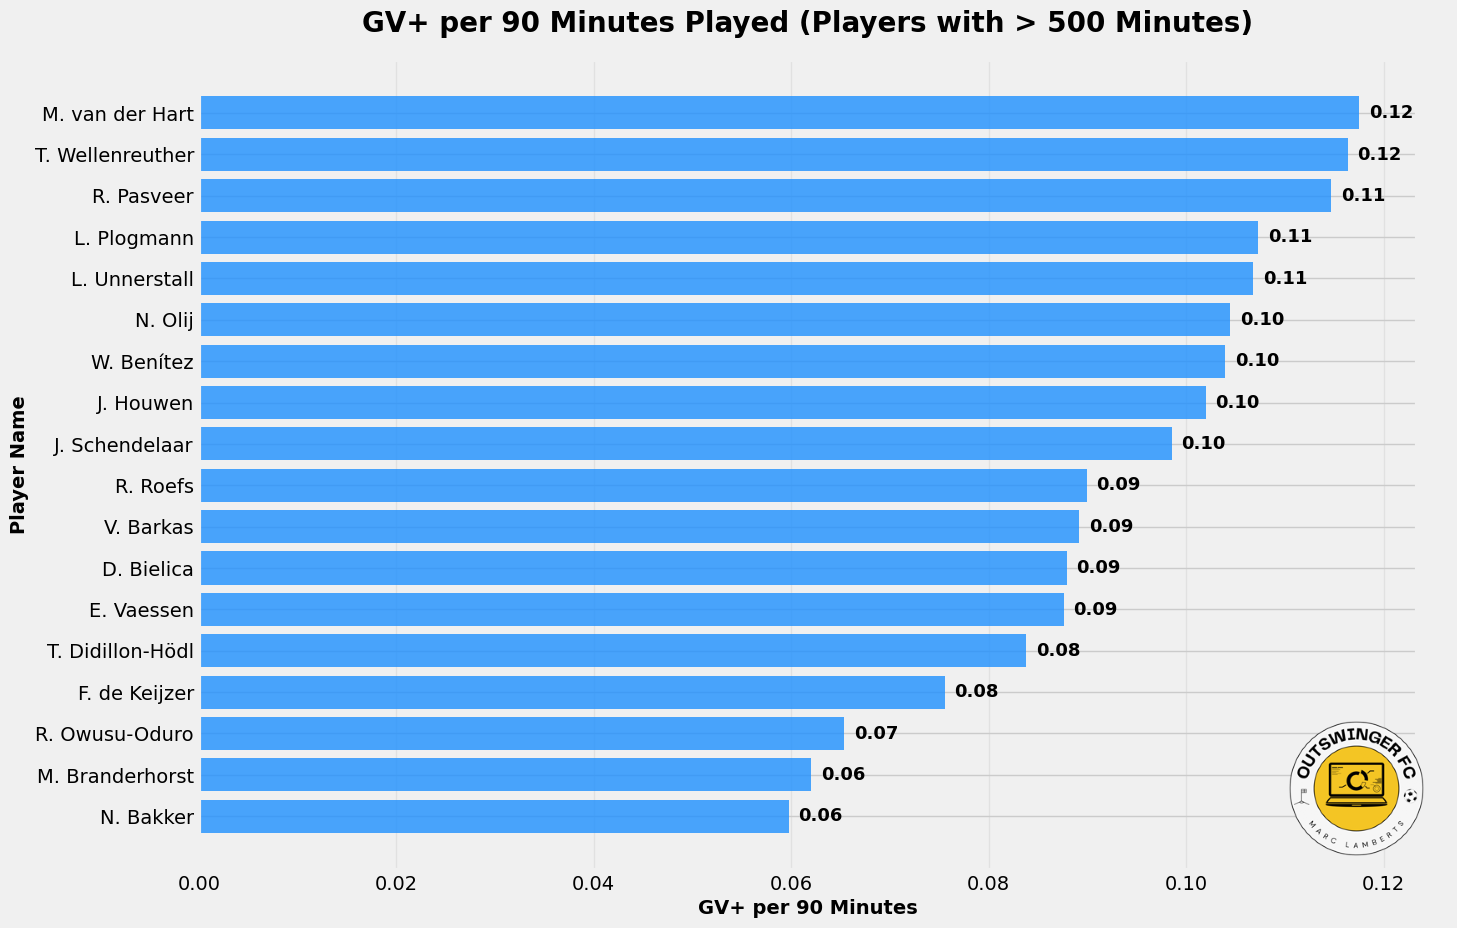

Bar graph saved to bargraph_gv_per_90_horizontal_with_logo.png


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the data
file_path = "passes_with_scaled_new_score_summary_0_to_2.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Filter players with Minutes played > 500
filtered_data = data[data['Minutes played'] > 500]

# Calculate GV+ per 90 minutes
filtered_data['GV+ per 90'] = (filtered_data['Scaled New Score'] / filtered_data['Minutes played']) * 90

# Sort players by GV+ per 90 for better bar graph ordering
filtered_data = filtered_data.sort_values(by='GV+ per 90', ascending=True)

# Define a function to add a logo to the plot
def add_logo(ax, logo_path, x=0.95, y=0.05, zoom=0.2):  # Position in bottom-right corner
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), xycoords='axes fraction', frameon=False)
    ax.add_artist(ab)

# Create the horizontal bar graph
plt.style.use('fivethirtyeight')  # Apply FiveThirtyEight style
fig, ax = plt.subplots(figsize=(14, 10))

# Bar chart
bars = ax.barh(
    filtered_data['playerName'],  # Player names as y-axis labels
    filtered_data['GV+ per 90'],  # GV+ per 90 values as bar lengths
    color='dodgerblue',           # Bar color
    alpha=0.8                     # Transparency
)

# Add values next to each bar
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.001,                   # Position to the right of the bar
        bar.get_y() + bar.get_height()/2,  # Center the text vertically
        f'{width:.2f}',               # Format the value
        ha='left',                    # Align text to the left
        va='center',                  # Align text vertically
        fontsize=13,                  # Font size
        weight='bold'                 # Bold for better visibility
    )

# Customize plot labels and title
ax.set_title('GV+ per 90 Minutes Played (Players with > 500 Minutes)', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('GV+ per 90 Minutes', fontsize=14, weight='bold')
ax.set_ylabel('Player Name', fontsize=14, weight='bold')

# Add gridlines for reference
ax.grid(axis='x', alpha=0.4)

# Add the logo
logo_path = "Outswinger FC (3).png"  # Replace with your logo file path
add_logo(ax, logo_path, x=0.95, y=0.1, zoom=0.6)  # Adjusted for logo in bottom-right corner

# Save the plot to a file
output_image = "bargraph_gv_per_90_horizontal_with_logo.png"
plt.savefig(output_image, dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Bar graph saved to {output_image}")
